# EGI Services

[https://www.egi.eu/services/](https://www.egi.eu/services/)


<img src="pictures/EGI_Services.png"  alt="Drawing" style="width: 1000px"/>

---


# **Přihlášení do EGI:**
 
 1) Vytvoření EGI účtu
 2) Přihlášení do vo.notebooks.egi.eu VO
 3) Příhlášení do EGI notebooks 

     

---

# 1) Vytvoření EGI účtu

[https://aai.egi.eu/signup](https://aai.egi.eu/signup)

<img src="pictures/Signup.png"  alt="Drawing" style="width: 900px"/>

<img src="pictures/ID.png"  alt="Drawing" style="width: 900px"/>

<img src="pictures/Agree.png"  alt="Drawing" style="width: 900px"/>

#### Check-in pošle email pro ověření požadavku a emailu (EGI Check-in Notifications)
Pokud nastane problém během celého procesu: [support@egi.eu](mailto:support@egi.eu)

---

# 2) Přihlášení do vo.notebooks.egi.eu VO

<img src="pictures/vo.png"  alt="Drawing" style="width: 1200px"/>

RT: 17237 [EGI-20210430-01] [TLP:AMBER] Security incident suspected at CESNET stále otevřené: update? 

<img src="pictures/vopurp.png"  alt="Drawing" style="width: 1200px"/>

---


# 3) Příhlášení do EGI notebooks: 
[https://notebooks.egi.eu](https://notebooks.egi.eu)

<img src="pictures/Ntb_startsite.png"  alt="Drawing" style="width: 1000px"/>

<img src="pictures/Check-in.png"  alt="Drawing" style="width: 1000px"/>

<img src="pictures/Checkin.png"  alt="Drawing" style="width: 1000px"/>

Celá přihlašovací procedura do EGI notebooků je zde: [https://docs.egi.eu/users/notebooks/](https://docs.egi.eu/users/notebooks/)

---


## Základní notebook:
### Limit na uživatele: 2 CPU, 4GB RAM, 20GB storage

 * Python
 * Dirac/Python 2 (EGI Workload Manager)
 * Julia
 * R
 * Octave

<img src="pictures/Ntbstart.png"  alt="Drawing" style="width: 2500px"/>

## MATLAB:

#### 1. Individuální nebo akademické licence

#### 2. Síťová licence

#### 3. Zkušební licence (bez toolboxů)

V tuto chvíli musí mít každý svou MATLAB licenci – máme tam implementovat CESNET licenci?

---


# Co v takovém notebooku může být? A k čemu je dobrý?

# Může v něm být nadpis - to už víme

Když je potřeba něco tučně, tak to jde udělat **tučně**

Nebo to může být *kurzívou*

Anebo to může být ***kurzívou a tučně***

---


# Můžeme nahrát [data](http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+) a zpracovat je:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/datatest.txt')

Dx = data["date"]

data['date'] = data.date.astype('datetime64[ns]')
data = data.set_index('date')

data.tail()

Temperature   Humidity  Light      CO2  HumidityRatio  \
date                                                                         
2015-02-04 10:38:59    24.290000  25.700000  808.0  1150.25       0.004829   
2015-02-04 10:40:00    24.330000  25.736000  809.8  1129.20       0.004848   
2015-02-04 10:40:59    24.330000  25.700000  817.0  1125.80       0.004841   
2015-02-04 10:41:59    24.356667  25.700000  813.0  1123.00       0.004849   
2015-02-04 10:43:00    24.408333  25.681667  798.0  1124.00       0.004860   

                     Occupancy  
date                            
2015-02-04 10:38:59          1  
2015-02-04 10:40:00          1  
2015-02-04 10:40:59          1  
2015-02-04 10:41:59          1  
2015-02-04 10:43:00          1

### Data obsahují měření v **konferenční** místnosti v ***čase***

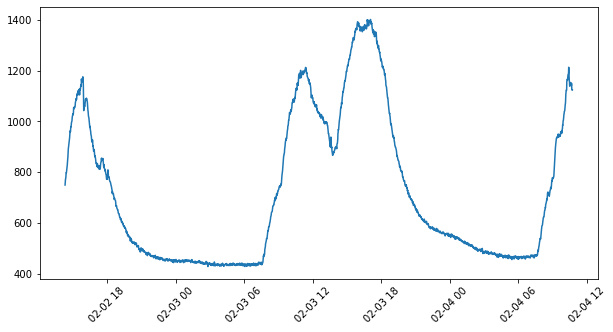

In [2]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
%matplotlib inline

#data['Occupancy'] = 100*data['Occupancy']
plt.figure(figsize=(10,5));
plt.plot(data.CO2);
plt.xticks(rotation=45);
#plt.ylabel('Temperature',fontsize = 20)

plt.show()

In [3]:
T = (data.Temperature-min(data.Temperature))
T = T/max(T)
H = (data.Humidity-min(data.Humidity))
H = H/max(H)
L = (data.Light-min(data.Light))
L = L/max(L)
C = (data.CO2-min(data.CO2))
C = C/max(C)

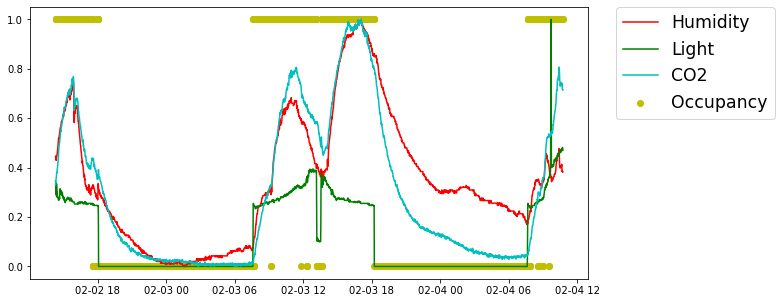

In [4]:
plt.figure(figsize=(10,5))
#Temp = plt.plot(T,'b',label = 'Temperature')
Humid = plt.plot(H,'r',label = 'Humidity')
Light = plt.plot(L,'g',label = 'Light')
CO = plt.plot(C,'c',label = 'CO2')
Occup = plt.scatter(Dx,data.Occupancy,c = 'y',label = 'Occupancy')
plt.legend(fontsize = 'xx-large',bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

## Závěr nebo hypotéza:   

### 1. datatest2 je divnej
### 2. někdo se tam vloupal
### 3. datatest je dobrej - sedí
### ... 

---



### Můžu použít nějakou statistiku - třeba rolling mean:

$$ \tau = \frac{\varpi - \omega}{\sqrt{\frac{\sum \varpi - \omega}{N(N-1)}}} $$

### Tohle sice není rolling mean, ale aspoň vidíte, že se sem dá dát i **LaTeX**

In [5]:
def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) 
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=50, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

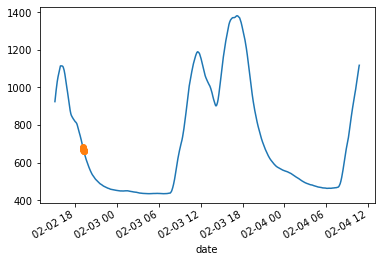

In [6]:
find_outliers(variable='CO2', window=50, sigma=10)

---



# Udělejme to víc interaktivní za pomoci [Panelu](https://panel.holoviz.org/index.html) (ať se nemusíme pořád hrabat v kódu):

Column
    [0] Column
        [0] IntSlider(end=150, name='window', start=-50, value=50)
        [1] IntSlider(end=30, name='sigma', start=-10, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00101')
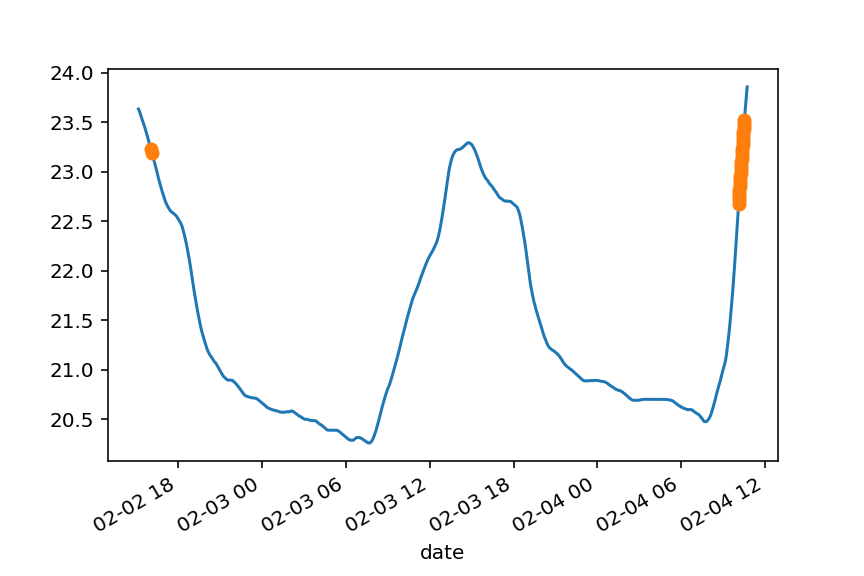

In [7]:
import panel as pn
pn.extension()

pn.interact(find_outliers)

In [8]:
kw = dict(window=(1, 60), variable=sorted(list(data.columns)), sigma=(1, 20))
i = pn.interact(find_outliers, **kw)
#i.pprint()

Column
    [0] Column
        [0] Markdown(str)
        [1] Select(name='variable', options=['CO2', 'Humidity', ...], value='Temperature')
        [2] IntSlider(end=60, name='window', start=1, value=50)
    [1] Matplotlib(Figure, name='interactive00114')
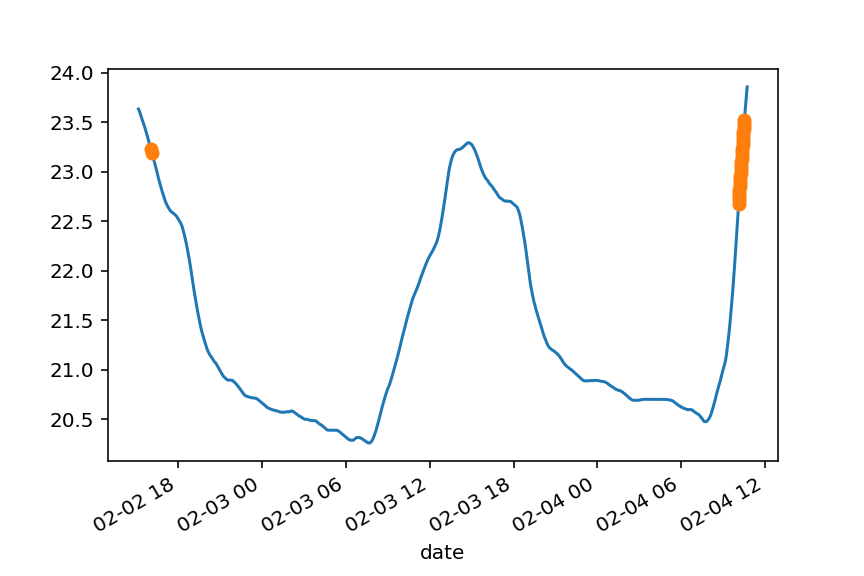

In [9]:
text = "<br>\n# Room measurements\nSelect the variable, and the time window for smoothing"

p = pn.Column(pn.Column(text, i[0][0], i[0][1]), i[1][0])
p

In [10]:
i[0][2]

IntSlider(end=20, name='sigma', start=1, value=10)

Column
    [0] Column
        [0] Markdown(str)
        [1] RadioButtonGroup(name='variable', options=['Temperature', ...], value='Temperature')
        [2] IntSlider(end=60, name='window', start=1, value=10)
    [1] ParamFunction(function)
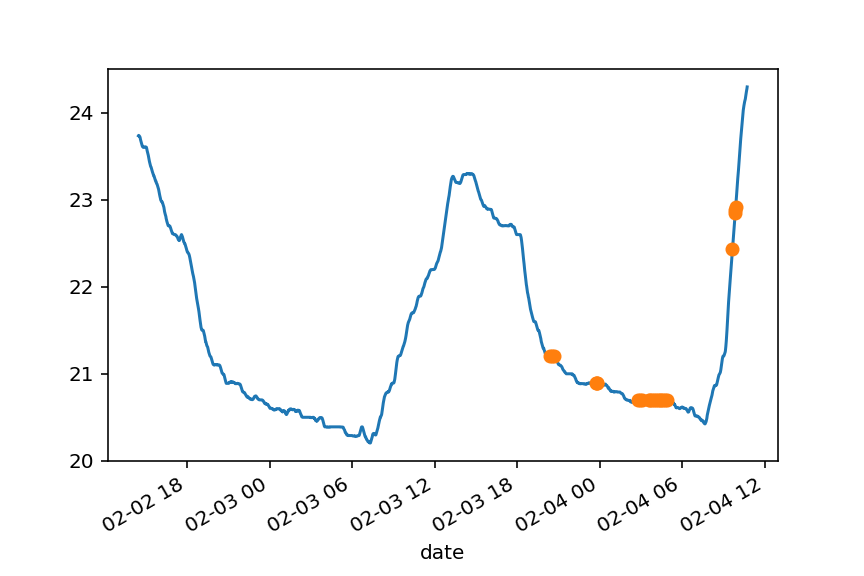

In [11]:
import panel.widgets as pnw

variable  = pnw.RadioButtonGroup(name='variable', value='Temperature', 
                                 options=list(data.columns))
window  = pnw.IntSlider(name='window', value=10, start=1, end=60)

reactive_outliers = pn.bind(find_outliers, variable, window, 10)

widgets   = pn.Column("<br>\n# Room measurements", variable, window)
occupancy = pn.Column(widgets,reactive_outliers)
occupancy

In [12]:
import param

class RoomOccupancy(param.Parameterized):
    variable  = param.Selector(objects=list(data.columns))
    window    = param.Integer(default=10, bounds=(1, 20))
    sigma     = param.Number(default=10, bounds=(0, 20))

    def view(self):
        return find_outliers(self.variable, self.window, self.sigma)
    
obj = RoomOccupancy()
obj

RoomOccupancy(name='RoomOccupancy00147', sigma=10, variable='Temperature', window=10)

Column
    [0] Column(margin=5, name='RoomOccupancy', width=300)
        [0] StaticText(value='<b>RoomOccupancy</b>')
        [1] Select(name='Variable', options=OrderedDict([('Temperature...]), value='Temperature')
        [2] IntSlider(end=20, name='Window', start=1, value=10)
        [3] FloatSlider(end=20, name='Sigma', value=10)
    [1] ParamMethod(method)
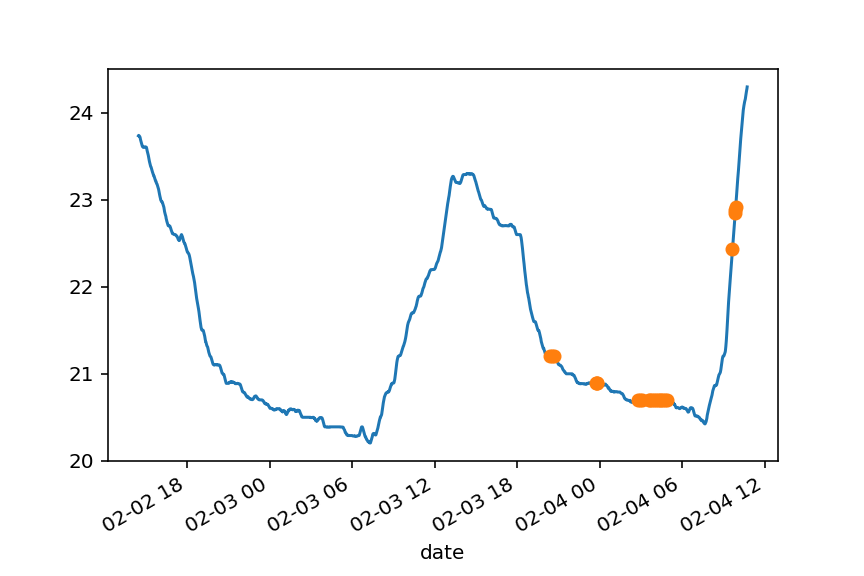

In [13]:
pn.Column(obj.param, obj.view)

In [14]:
import hvplot.pandas

def hvplot(avg, highlight):
    line = avg.hvplot(height=300, width=550)
    avg.hvplot(height=300) * highlight.hvplot.scatter(color='orange', padding=0.1)
    outliers = highlight.hvplot.scatter(color='orange', padding=0.1)
    return (line * outliers).opts(legend_position='top_right') 

text2 = "## Room Occupancy\nSelect the variable and the smoothing values"
hvp   = pn.interact(find_outliers, view_fn=hvplot, **kw)
pn.Column(pn.Row(pn.panel(text2, width=200), hvp[0]), hvp[1]).servable("Occupancy")

Column
    [0] Row
        [0] Markdown(str, width=200)
        [1] Column
            [0] Select(name='variable', options=['CO2', 'Humidity', ...], value='Temperature')
            [1] IntSlider(end=60, name='window', start=1, value=50)
            [2] IntSlider(end=20, name='sigma', start=1, value=10)
    [1] Row
        [0] HoloViews(Overlay, name='interactive01621')

In [15]:
import holoviews as hv

tap = hv.streams.PointerX(x=data.index.min())

def hvplot2(avg, highlight):
    line = avg.hvplot(height=300, width=500)
    outliers = highlight.hvplot.scatter(color='orange', padding=0.1)
    tap.source = line
    return (line * outliers).opts(legend_position='top_right')

@pn.depends(tap.param.x)
def table(x):
    index = np.abs((data.index - x).astype(int)).argmin()
    return data.iloc[index]

app = pn.interact(find_outliers, view_fn=hvplot2, **kw)

pn.Column(
    pn.Column("## Room Occupancy\nHover over the plot for more information.", app[0]),
    pn.Column(app[1], table)
)

/tmp/ipykernel_9930/4098946290.py:13: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  index = np.abs((data.index - x).astype(int)).argmin()


Column
    [0] Column
        [0] Markdown(str)
        [1] Column
            [0] Select(name='variable', options=['CO2', 'Humidity', ...], value='Temperature')
            [1] IntSlider(end=60, name='window', start=1, value=50)
            [2] IntSlider(end=20, name='sigma', start=1, value=10)
    [1] Column
        [0] Row
            [0] HoloViews(Overlay, name='interactive02379')
        [1] ParamFunction(function)

---


In [16]:
from IPython.display import Audio, YouTubeVideo

In [17]:
Audio('audio/simpleLoop.wav')

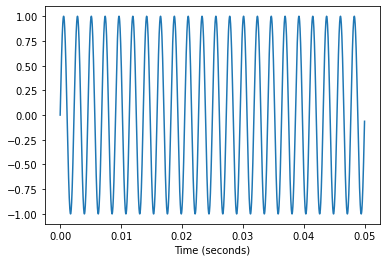

In [18]:
T = 0.05    # seconds
fs = 44100   # sampling frequency
t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable
x = np.sin(2*np.pi*440*t)     
plt.plot(t, x)
plt.xlabel('Time (seconds)')
plt.show()

In [19]:
fs = 44100 # sampling frequency
T = 1.5    # seconds
t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable
x = np.sin(2*np.pi*440*t)                # pure sine wave at 440 Hz
Audio(x, rate=fs)

---

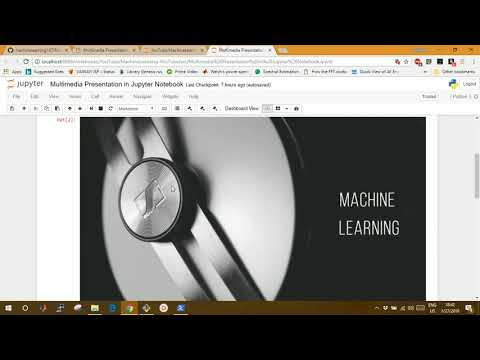

In [20]:
id = 'ER4WhBxM8DY'
YouTubeVideo(id=id, width = 700, height = 400)

# Dokonce se sem dá dát i gif

<img src="pictures/MonaLisa.gif"  alt="Drawing" style="width: 400px"/>


...ale v pdf to nefunguje...



---


# K čemu tedy ty notebooky jsou, nebo mohou být:

**1. Interaktivní učební pomůcka nebo interaktivní tutorial**

**2. Vytváření reportů nebo manuscriptů**

**3. Workflow od dat až po interpretaci výsledků**

---


# Co když někdo Jupyter nemá? Nebo nemá přístup do EGI nebo Metacentra?

Nevadí, dáme to do [Binderu](https://mybinder.org/)

<img src="pictures/Binder.png"  alt="Drawing" style="width: 900px"/>

[Rychlý odkaz](https://mybinder.org/v2/gh/AxelFoul/Prezentace.git/HEAD)

---


# EGI DataHub – OneData 
[https://datahub.egi.eu/ozw/onezone/i#/login](https://datahub.egi.eu/ozw/onezone/i#/login)

### Běží zatím jen na training notebooks:
[https://training.notebooks.egi.eu](https://training.notebooks.egi.eu)

### Připojení DataHubu automaticky i pro:
[https://notebooks.egi.eu](https://notebooks.egi.eu)

Jira ticket: [https://jira.egi.eu/browse/ACETA-52](https://jira.egi.eu/browse/ACETA-52)

<img src="pictures/DATAHUB.png"  alt="Drawing" style="width: 800px"/>

---


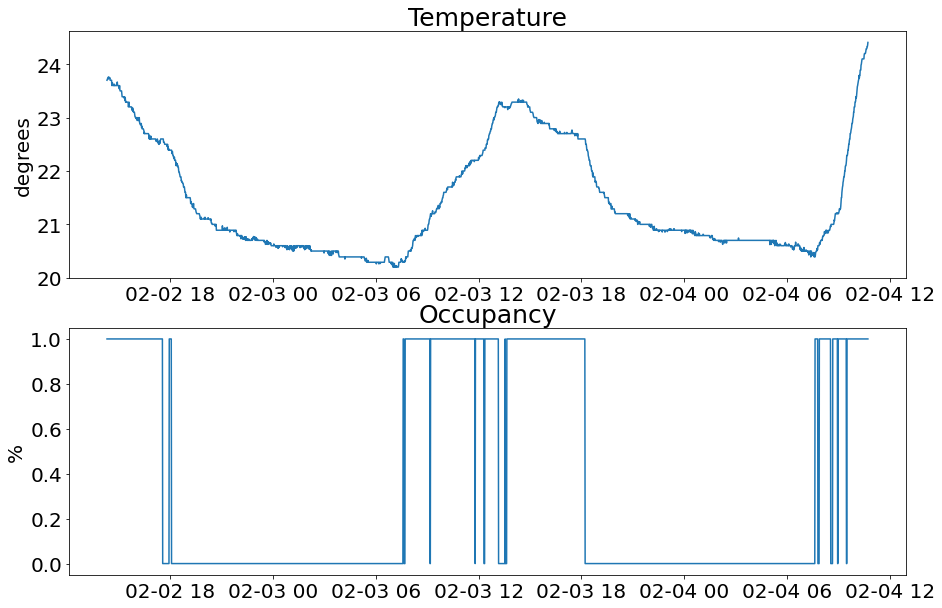

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(data.Temperature)
plt.ylabel('degrees',fontsize = 20)

plt.title('Temperature',fontsize = 25)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.subplot(212)
plt.plot(data.Occupancy)
plt.ylabel('%',fontsize = 20)

plt.title('Occupancy',fontsize = 25)

plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

plt.show()

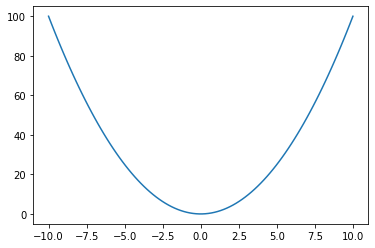

In [22]:
x = np.linspace(-10,10, num = 100)
y = x*x
plt.plot(x,y)
plt.show()